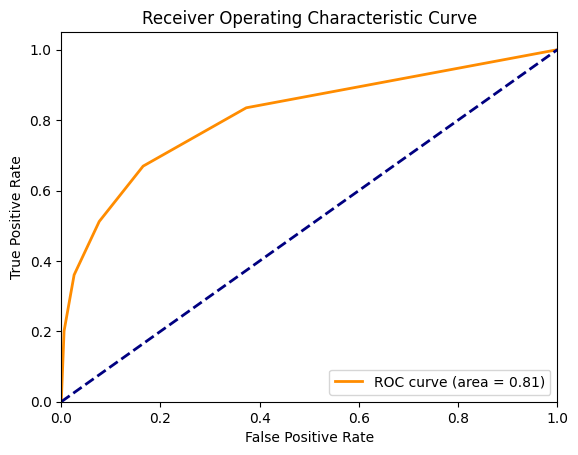

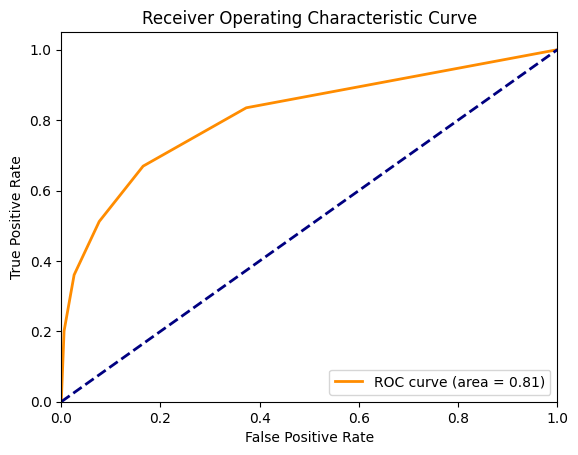

Traceback (most recent call last):
  File "/opt/anaconda3/envs/sid/lib/python3.11/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "/opt/anaconda3/envs/sid/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/opt/anaconda3/envs/sid/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/sid/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/opt/anaconda3/envs/sid/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/sid/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 175, in exec

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [6]:
import os
import pandas as pd
from pandasai import Agent
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Sample DataFrame

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
os.environ["PANDASAI_API_KEY"] = "$2a$10$7VpELeb8twh9xxhazy.S0eYlS0j0qJxRiKUblX7lfVvb/BW.a5.mG"

agent = Agent("datasets/credit_risk_dataset.csv")
agent.chat('draw a ROC curve for KNN')